In [1]:
import torch
import os

import numpy as np
import pandas as pd


In [2]:
#pip install tqdm
#!pip install imblearn
from tqdm import tqdm

In [3]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE =\
["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from torch import nn, optim
import torch.nn.functional as F


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [7]:
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix


In [8]:
import joblib

In [ ]:
#### TESTING SVM 

In [27]:
svm = joblib.load('SVMmodel.pkl')

In [28]:
svm

SVC()

In [12]:
X_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

In [13]:
X_test

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,Humidity3pm,Pressure9am,RainToday
0,0.494062,0.474725,0.001632,0.271318,0.149425,0.40,0.608264,0.0
1,0.420428,0.298901,0.015778,0.286822,0.149425,0.59,0.641322,1.0
2,0.382423,0.375824,0.001088,0.356589,0.172414,0.58,0.791736,0.0
3,0.361045,0.270330,0.001632,0.372093,0.252874,0.75,0.352066,0.0
4,0.555819,0.461538,0.000000,0.224806,0.126437,0.68,0.723967,0.0
...,...,...,...,...,...,...,...,...
23968,0.503563,0.527473,0.000000,0.255814,0.103448,0.65,0.609917,0.0
23969,0.646081,0.426374,0.000000,0.511628,0.471264,0.61,0.509091,0.0
23970,0.337292,0.404396,0.000000,0.155039,0.080460,0.23,0.766942,0.0
23971,0.598575,0.602198,0.000000,0.209302,0.126437,0.49,0.581818,0.0


In [14]:
y_test

,RainTomorrow
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
23968,0.0
23969,1.0
23970,0.0
23971,0.0


In [19]:
# See precision, recall and F1 score
precision,recall,f,support = precision_recall_fscore_support(y_test, svm.predict(X_test))
print('precision',precision,'\nrecall',recall,'\nF1',f,'\nsupport',support)

precision [0.85318586 0.77529286] 
recall [0.96611893 0.41285444] 
F1 [0.90614724 0.53879364] 
support [18683  5290]


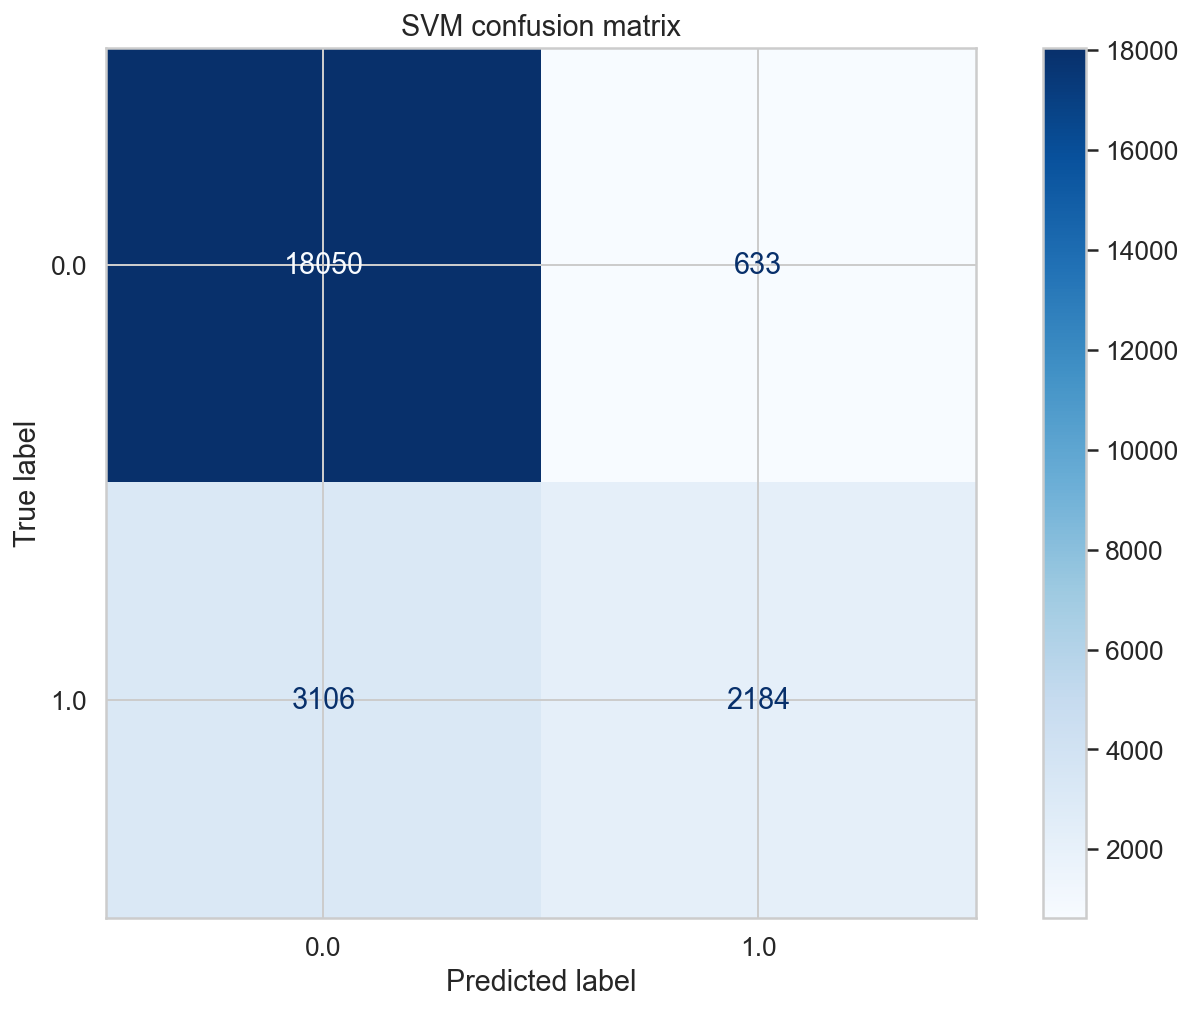

In [22]:
Confusion_matrix = plot_confusion_matrix(svm, X_test, y_test, cmap=plt.cm.Blues)
Confusion_matrix.ax_.set_title('SVM confusion matrix')
plt.show()

In [23]:
### Testing MLP


In [9]:
mlp = joblib.load('MLPmodel.pkl')

In [10]:
mlp

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [13]:
y_test = y_test.squeeze()
X_test = torch.tensor(X_test.to_numpy()).float()
y_test = torch.tensor(y_test.to_numpy()).long()

In [14]:
X_test

tensor([[0.4941, 0.4747, 0.0016,  ..., 0.4000, 0.6083, 0.0000],
        [0.4204, 0.2989, 0.0158,  ..., 0.5900, 0.6413, 1.0000],
        [0.3824, 0.3758, 0.0011,  ..., 0.5800, 0.7917, 0.0000],
        ...,
        [0.3373, 0.4044, 0.0000,  ..., 0.2300, 0.7669, 0.0000],
        [0.5986, 0.6022, 0.0000,  ..., 0.4900, 0.5818, 0.0000],
        [0.3800, 0.4044, 0.0000,  ..., 0.4400, 0.7074, 0.0000]])

In [15]:
y_test

tensor([0, 0, 0,  ..., 0, 0, 0])

In [16]:
precision,recall,f,support = precision_recall_fscore_support(y_test, mlp.predict(X_test))
print('precision',precision,'\nrecall',recall,'\nF1',f,'\nsupport',support)

precision [0.86190614 0.75302889] 
recall [0.95744795 0.45822306] 
F1 [0.9071684  0.56974968] 
support [18683  5290]


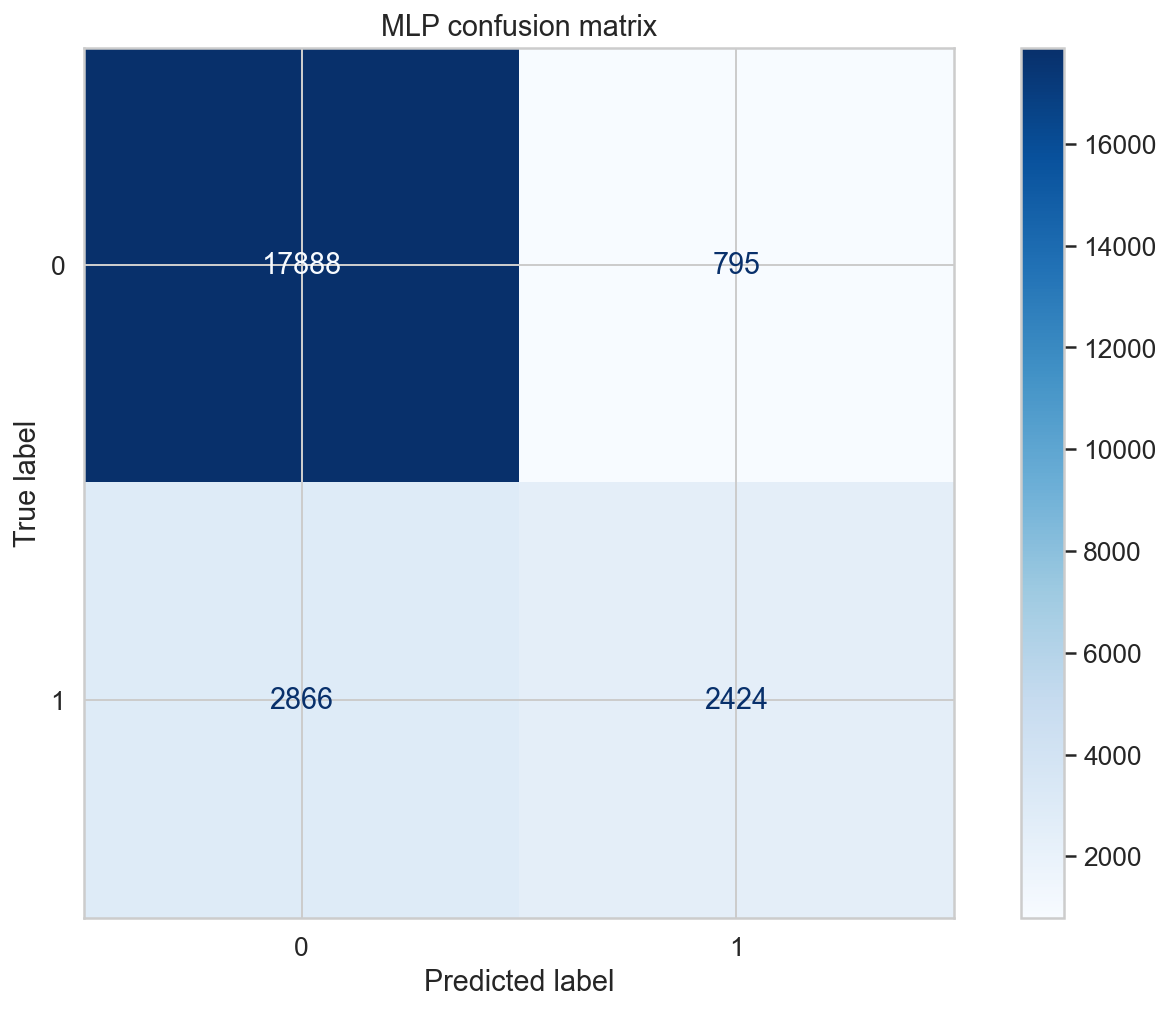

In [17]:
Confusion_matrix = plot_confusion_matrix(mlp, X_test, y_test, cmap=plt.cm.Blues)
Confusion_matrix.ax_.set_title('MLP confusion matrix')
plt.show()